## Capítulo 6 - Medidas de posição

## Trabalhando com variáveis contínuas - quantitativas

In [1]:
%pip install pandas
%pip install numpy
%pip install plotly.express
%pip install seaborn
%pip install matplotlib

import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from src.dataframes import data_AVC


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
2     31112    Male  80.0             0              1          Yes

### Médias e Modas (somente com as ocorrências de AVC)
#### Média - soma de todos os valores do conjunto de dados dividida pelo número total de elementos
#### Moda - valor que ocorre com mais frequência no conjunto de dados

In [2]:
media_idade_AVC = data_AVC['age'].mean()
media_glucose_AVC = data_AVC['avg_glucose_level'].mean()
media_bmi_AVC = data_AVC['bmi'].mean()

moda_idade_AVC = data_AVC['age'].mode().iloc[0]
moda_glucose_AVC = data_AVC['avg_glucose_level'].mode().iloc[0]
moda_bmi_AVC = data_AVC['bmi'].mode().iloc[0]

print("media idade: {:.2f}\nmedia nivel medio de glicose: {:.2f}\nmedia de IMC: {:.2f}".format(media_idade_AVC, media_glucose_AVC, media_bmi_AVC))
print("\nmoda idade: {:.2f}\nmoda nivel medio de glicose: {:.2f}\nmoda de IMC: {:.2f}".format(moda_idade_AVC, moda_glucose_AVC, moda_bmi_AVC))

media idade: 67.73
media nivel medio de glicose: 132.54
media de IMC: 30.47

moda idade: 78.00
moda nivel medio de glicose: 101.45
moda de IMC: 27.30


### Medianas - valor central na sequência crescente ou decrescente dos dados de um conjunto
(Com a reordenação das colunas espeficicas do dataframe para cada mediana calculada)

In [3]:
data_AVC.sort_values(by='age', inplace=True)
mediana_idade_AVC = data_AVC['age'].median()

data_AVC.sort_values(by='avg_glucose_level', inplace=True)
mediana_glucose_AVC = data_AVC['avg_glucose_level'].median()

data_AVC.sort_values(by='bmi', inplace=True)
mediana_bmi_AVC = data_AVC['bmi'].median()

print("mediana idade: ", mediana_idade_AVC, "\nmediana nivel medio de glicose: ", mediana_glucose_AVC, "\nmediana de IMC: ", mediana_bmi_AVC)


mediana idade:  71.0 
mediana nivel medio de glicose:  105.22 
mediana de IMC:  29.7


/tmp/ipykernel_40941/826060412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AVC.sort_values(by='age', inplace=True)
/tmp/ipykernel_40941/826060412.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AVC.sort_values(by='avg_glucose_level', inplace=True)
/tmp/ipykernel_40941/826060412.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_AVC.sort_values(by='bmi', inplace=True)


### Posições relativas da média, moda e mediana

In [4]:
#idade
if media_idade_AVC == mediana_idade_AVC:
    if media_idade_AVC == moda_idade_AVC:
        curva_idade = "a idade representa uma curva simétrica"
elif media_idade_AVC > mediana_idade_AVC:
    if mediana_idade_AVC > moda_idade_AVC:
        curva_idade = "a idade representa uma curva assimétrica positiva"
else:
    if mediana_idade_AVC < moda_idade_AVC:
         curva_idade = "a idade representa uma curva assimétrica negativa"

#nivel glucose
if media_glucose_AVC == mediana_glucose_AVC:
    if media_glucose_AVC == moda_glucose_AVC:
        curva_glucose = "o nivel de glicose medio representa uma curva simétrica"
elif media_glucose_AVC > mediana_glucose_AVC:
    if mediana_glucose_AVC > moda_glucose_AVC:
        curva_glucose = "o nivel de glicose medio representa uma curva assimétrica positiva"
else:
    if mediana_glucose_AVC < moda_glucose_AVC:
         curva_glucose = "o nivel de glicose medio representa uma curva assimétrica negativa"

#bmi (imc)
if media_bmi_AVC == mediana_glucose_AVC:
    if media_bmi_AVC == moda_bmi_AVC:
        curva_bmi = "o IMC representa uma curva simétrica"
elif media_glucose_AVC > mediana_glucose_AVC:
    if mediana_glucose_AVC > moda_bmi_AVC:
        curva_bmi = "o IMC representa uma curva assimétrica positiva"
else:
    if mediana_glucose_AVC < moda_bmi_AVC:
         curva_bmi = "o IMC representa uma curva assimétrica negativa"

In [5]:
#idade
prel_idade = px.line(x=['Média idade', 'Moda idade', 'Mediana idade'], y=[media_idade_AVC, moda_idade_AVC, mediana_idade_AVC], labels={'x':'','y':'Valores'}, title="Posição Relativa da Média, Moda e Mediana da idade", width=700, height=500)
prel_idade.update_traces(mode='lines+markers', line=dict(shape='spline'))
prel_idade.show()
print(curva_idade)

#avg_glucose_level
prel_glucose = px.line(x=['Média nível glicose', 'Moda nível glicose', 'Mediana nível glicose'], y=[media_glucose_AVC, moda_glucose_AVC, mediana_glucose_AVC], labels={'x':'','y':'Valores'}, title="Posição Relativa da Média, Moda e Mediana do nível médio de glicose", width=700, height=500)
prel_glucose.update_traces(mode='lines+markers', line=dict(shape='spline'))
prel_glucose.show()
print(curva_glucose)

#bmi (imc)
prel_bmi = px.line(x=['Média IMC', 'Moda IMC', 'Mediana IMC'], y=[media_bmi_AVC, moda_bmi_AVC, mediana_bmi_AVC], labels={'x':'','y':'Valores'}, title="Posição Relativa da Média, Moda e Mediana do IMC", width=700, height=500)
prel_bmi.update_traces(mode='lines+markers', line=dict(shape='spline'))
prel_bmi.show()
print(curva_bmi)

a idade representa uma curva assimétrica negativa


o nivel de glicose medio representa uma curva assimétrica positiva


o IMC representa uma curva assimétrica positiva


### Separatrizes - Quartis e Percentis

In [6]:
#ver ainda como colocar em grafico - boxplot talvez
quartis_idade = data_AVC['age'].quantile([0.25, 0.5, 0.75])
percentis_idade = data_AVC['age'].quantile([0.10, 0.90])
print("Quartis de idade:")
print(quartis_idade)
print("\nPercentis de idade:")
print(percentis_idade)

quartis_glucose = data_AVC['avg_glucose_level'].quantile([0.25, 0.5, 0.75])
percentis_glucose = data_AVC['avg_glucose_level'].quantile([0.10, 0.90])
print("\nQuartis de nível médio de glicose:")
print(quartis_glucose)
print("\nPercentis de nível médio de glicose:")
print(percentis_glucose)

quartis_bmi = data_AVC['bmi'].quantile([0.25, 0.5, 0.75])
percentis_bmi = data_AVC['bmi'].quantile([0.10, 0.90])
print("\nQuartis de IMC:")
print(quartis_bmi)
print("\nPercentis de IMC:")
print(percentis_bmi)

Quartis de idade:
0.25   59.00
0.50   71.00
0.75   78.00
Name: age, dtype: float64

Percentis de idade:
0.10   51.00
0.90   80.00
Name: age, dtype: float64

Quartis de nível médio de glicose:
0.25    79.79
0.50   105.22
0.75   196.71
Name: avg_glucose_level, dtype: float64

Percentis de nível médio de glicose:
0.10    68.51
0.90   221.81
Name: avg_glucose_level, dtype: float64

Quartis de IMC:
0.25   26.40
0.50   29.70
0.75   33.70
Name: bmi, dtype: float64

Percentis de IMC:
0.10   23.48
0.90   38.80
Name: bmi, dtype: float64


## Análise gráfica final

In [7]:
#gerando dataframe separado com aquelas 3 variaveis
analise = data_AVC[['age', 'avg_glucose_level', 'bmi']]

analise = analise.sort_values(by=['age'], kind='stable')
analise = analise.dropna(subset=['bmi'])
analise

,age,avg_glucose_level,bmi
245,14,57.93,30.90
182,32,76.13,29.90
118,38,82.28,24.00
210,39,83.24,26.30
228,39,97.76,29.60
...,...,...,...
187,82,215.94,27.90
128,82,200.59,29.00
188,82,86.62,29.50
23,82,208.30,32.50


    Boxplot da idade com as separatrizes

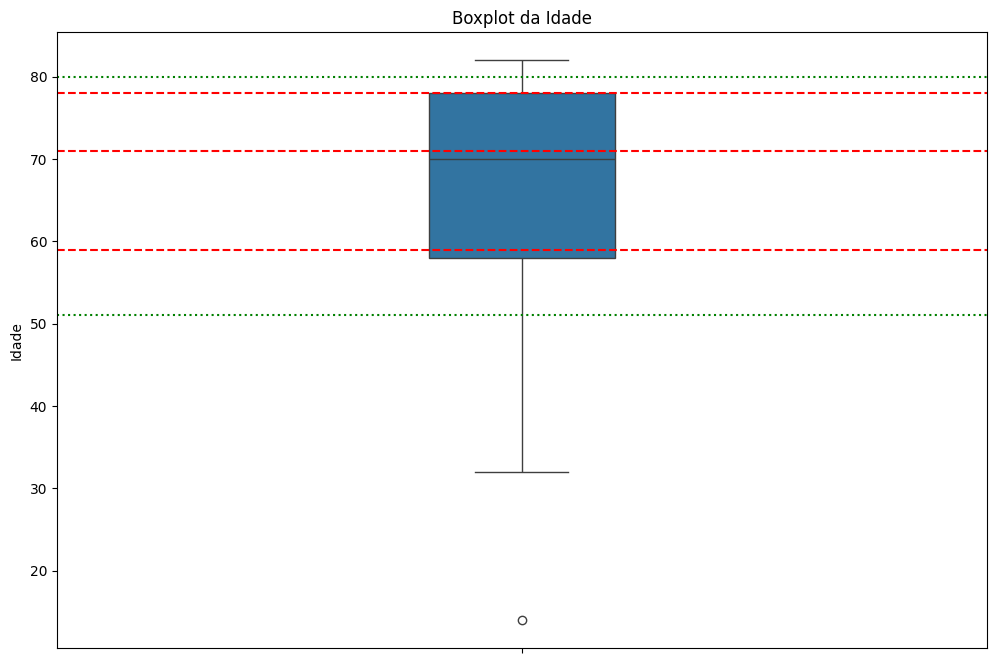

In [8]:
plt.figure(figsize=(12, 8))

# Boxplot da idade
sns.boxplot(y='age', data=analise, orient='v', width=0.2)
plt.title('Boxplot da Idade')
plt.ylabel('Idade')

# Adicione linhas para os quartis e percentis da idade
for q in quartis_idade:
    plt.axhline(y=q, color='r', linestyle='--', linewidth=1.5)

for p in percentis_idade:
    plt.axhline(y=p, color='g', linestyle=':', linewidth=1.5)

plt.show()

    Boxplot do nível médio de glicose com as separatrizes

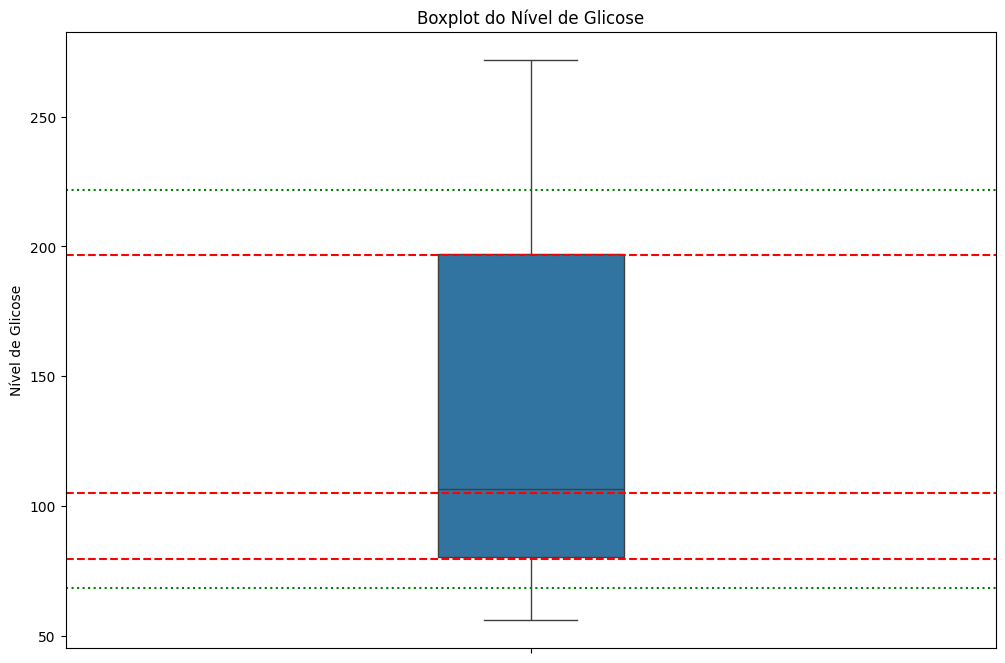

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='avg_glucose_level', data=analise, orient='v', width=0.2)
plt.title('Boxplot do Nível de Glicose')
plt.ylabel('Nível de Glicose')

# Adicione linhas para os quartis e percentis do nível de glicose
for q in quartis_glucose:
    plt.axhline(y=q, color='r', linestyle='--', linewidth=1.5)

for p in percentis_glucose:
    plt.axhline(y=p, color='g', linestyle=':', linewidth=1.5)

plt.show()

    Boxplot do IMC com as separatrizes

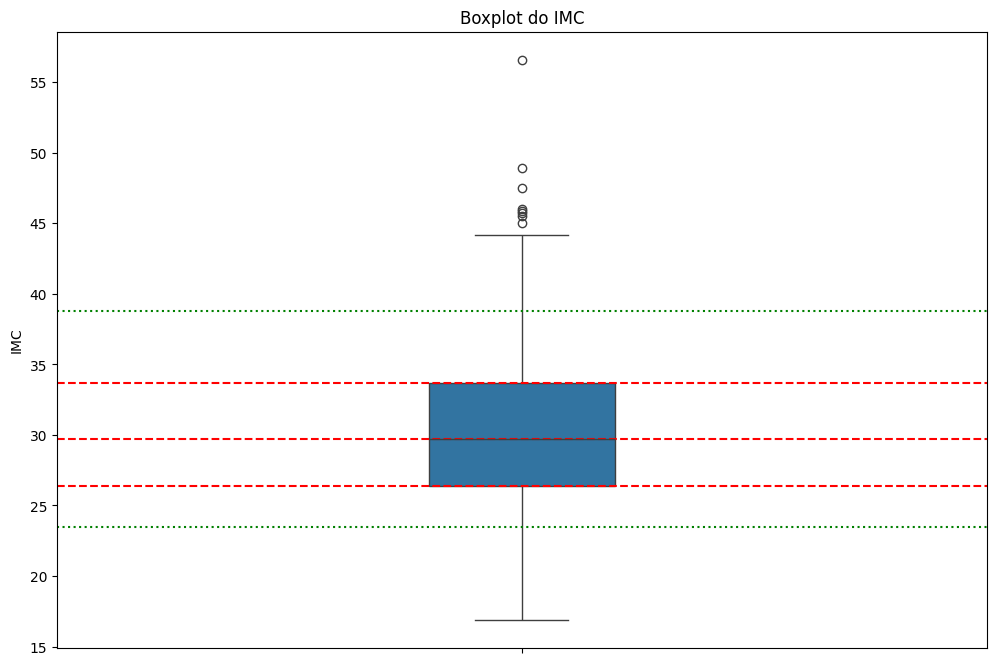

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(y='bmi', data=analise, orient='v', width=0.2)
plt.title('Boxplot do IMC')
plt.ylabel('IMC')

# Adicione linhas para os quartis e percentis do IMC
for q in quartis_bmi:
    plt.axhline(y=q, color='r', linestyle='--', linewidth=1.5)

for p in percentis_bmi:
    plt.axhline(y=p, color='g', linestyle=':', linewidth=1.5)

plt.show()